In [0]:
#import package
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

In [2]:
flights_url = 'https://github.com/WillKoehrsen/Data-Analysis/raw/master/univariate_dist/data/formatted_flights.csv'
res = requests.get(flights_url, allow_redirects=True)
open('Data.csv', 'wb').write(res.content)

10420748

In [4]:
def load_flights_df():
  flights_df = pd.read_csv('Data.csv')
  flights_df = flights_df.drop(flights_df.columns[0], axis=1)
  return flights_df

data = load_flights_df()
data.head(10)

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.
5,12.0,United Air Lines Inc.
6,19.0,JetBlue Airways
7,-14.0,ExpressJet Airlines Inc.
8,-8.0,JetBlue Airways
9,8.0,American Airlines Inc.


In [21]:
flight_name=list(data['name'].unique());
flight_name.sort()
print(flight_name)

['AirTran Airways Corporation', 'Alaska Airlines Inc.', 'American Airlines Inc.', 'Delta Air Lines Inc.', 'Endeavor Air Inc.', 'Envoy Air', 'ExpressJet Airlines Inc.', 'Frontier Airlines Inc.', 'Hawaiian Airlines Inc.', 'JetBlue Airways', 'Mesa Airlines Inc.', 'SkyWest Airlines Inc.', 'Southwest Airlines Co.', 'US Airways Inc.', 'United Air Lines Inc.', 'Virgin America']


In [0]:
def plot(df,col,ax):
  data=df[df['name']==col]
  # Draw the density plot
  f = sns.distplot(data['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = col)
  # Fix the plot dimensions to make the airlines easier comparable
  f.set(xlim=(-75, 125))
  f.set(ylim=(0, 0.0275))
  #Plot formatting
  ax.legend(prop={'size': 16}, title = 'flight')

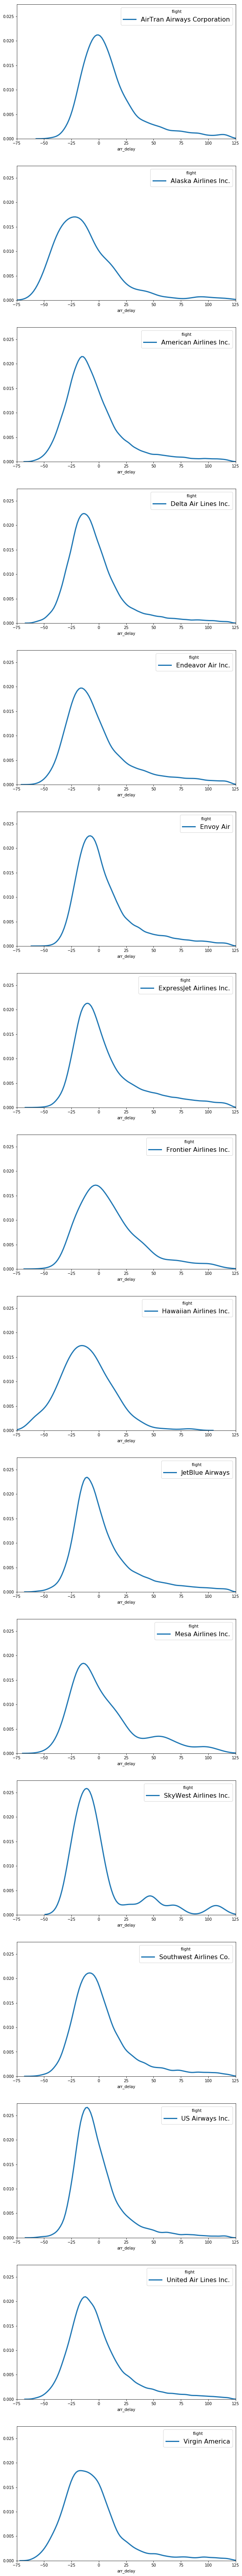

In [23]:
plt.figure(figsize=(10,120))
i=0
for flight in flight_name:
    ax = plt.subplot(len(flight_name),1, 1+i)
    plot(data,flight,ax)
    i=i+1

In [25]:
for flight in flight_name:
  df=data[data['name']==flight]
  print(flight)
  print(df.describe())

AirTran Airways Corporation
         arr_delay
count  3021.000000
mean     10.543860
std      27.837712
min     -44.000000
25%      -8.000000
50%       4.000000
75%      20.000000
max     120.000000
Alaska Airlines Inc.
        arr_delay
count  689.000000
mean   -11.878084
std     29.566533
min    -60.000000
25%    -31.000000
50%    -18.000000
75%      1.000000
max    119.000000
American Airlines Inc.
          arr_delay
count  31197.000000
mean      -3.985960
std       28.257029
min      -60.000000
25%      -22.000000
50%      -10.000000
75%        6.000000
max      120.000000
Delta Air Lines Inc.
          arr_delay
count  46468.000000
mean      -3.246191
std       26.723283
min      -60.000000
25%      -20.000000
50%       -9.000000
75%        6.000000
max      120.000000
Endeavor Air Inc.
          arr_delay
count  16578.000000
mean      -0.261913
std       31.999876
min      -60.000000
25%      -21.000000
50%       -9.000000
75%       11.000000
max      120.000000
Envoy Air
      

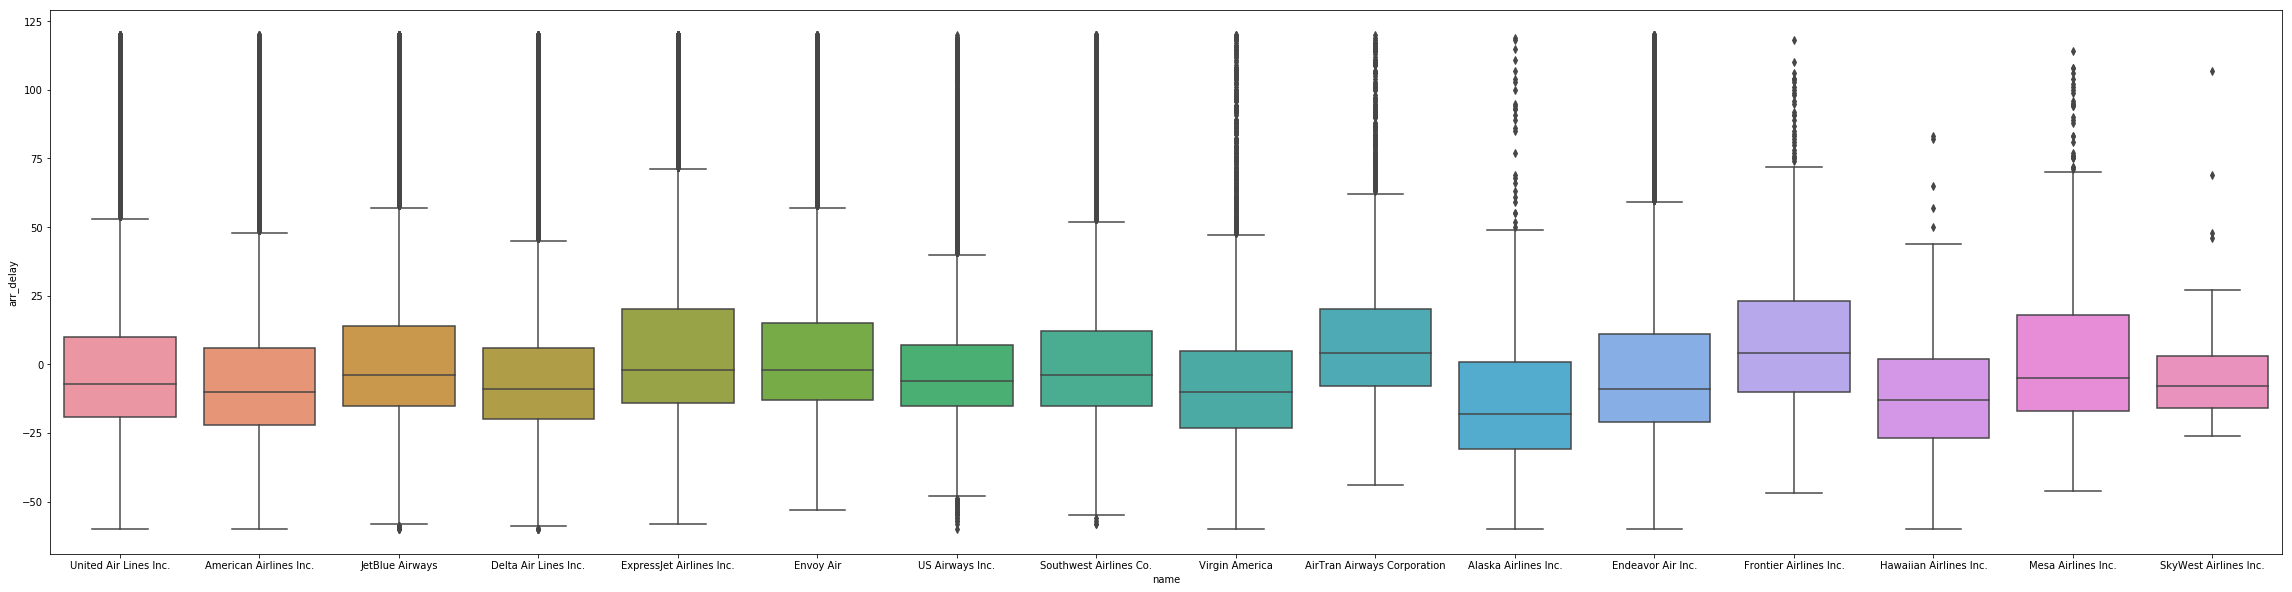

In [30]:
plt.figure(figsize=(40, 10))
sns.boxplot(x='name',y='arr_delay',data=data)  

**by seeing boxplot and seeing quartile values we can see that flight of Alaska Airlines hence it is best flight to take  for journey or iteratively find best flight(logic:-  flight comes before than arrival time then take flight which arrive before is the best flight)**

In [32]:
maxname = ''
max_num = 0
for name in flight_name:
  nums = data[data['name'] == name]['arr_delay']
  counts = nums.apply(lambda x:1 if x <= 0 else 0)
  count = counts.sum()
  if max_num < count / nums.count():
    max_num = count / nums.count()
    maxname = name
print(maxname)

Alaska Airlines Inc.


### ***2) Use the same airline data to demonstrate (or disprove) the four aspects of the Central Limit Theorem (from Central Limit Theorem video).***

In [35]:
import numpy as np
mean_all = data['arr_delay'].mean()
std_all = data['arr_delay'].std()
(mean_all,std_all)

(1.2971432896160044, 29.064401023259187)

In [0]:
def GaussianPlot(means,ax,sample):
  f=sns.distplot(means,kde=True,ax=ax,label='mean: '+ str(np.array(means).mean()) + ' std: '+str(np.array(means).std()))
  f.set(xlim=(-50, 50))
  ax.set_title('Histogram of mean with sample size = %d' % sample, size = 10)
  ax.set_xlabel('Delay (min)', size = 15)
  ax.set_ylabel('Flights', size= 15)
  ax.legend()

317113


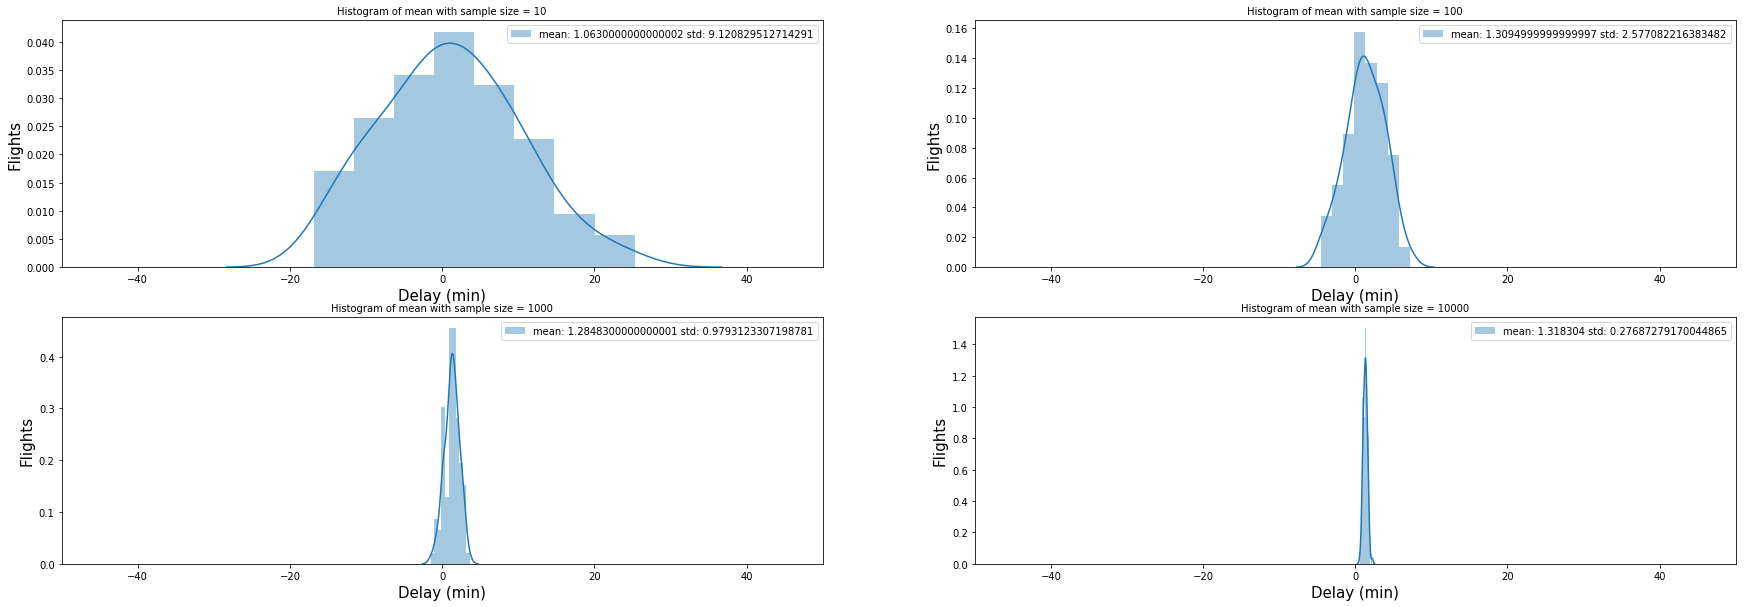

In [63]:
samples_size = [10,100,1000,10000]
i=0
fig,axes = plt.subplots(2,2,figsize=(30,10))
axes = axes.flatten()
for sample in samples_size:
  means = []
  for _ in range(100):
    idx = np.random.choice(data.count()[0],sample)
    nums = data.iloc[idx]['arr_delay']
    means.append(nums.mean())
  GaussianPlot(means,axes[i],sample)
  i=i+1
print(data.count()[0])

***if  n is large enough, then a standard normal distribution is a good approximation of the distribution of the standardized sample mean; Hence Proved***